# Genero

importamos librerias

In [179]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [180]:
df2020 = pd.read_csv('../kaggle_survey_2020_responses.csv',
                               low_memory=False)
df2018 = pd.read_csv('../multipleChoiceResponses.csv',
                               low_memory=False)

In [181]:
df2018.shape


(23860, 395)

In [182]:
df2020.shape

(20037, 355)

In [183]:
#para 2020
columnasAgeGenderCountry = ['Q1','Q2','Q3']

In [184]:
dfGenero2020 = df2020[columnasAgeGenderCountry]
dfGenero2018 = df2018[columnasAgeGenderCountry]


In [185]:
dfGenero2020["Year"]=2020
dfGenero2018["Year"]=2018

In [186]:
dfGenero2020.shape[0]

20037

In [187]:
dfGenero2020.drop([0],inplace=True)
dfGenero2020.reset_index(drop=True,inplace=True)
dfGenero2018.drop([0],inplace=True)
dfGenero2018.reset_index(drop=True,inplace=True)

In [188]:
dict1 = {'Q1': 'P2',
        'Q2': 'P1'}
  
dfGenero2018.rename(columns=dict1,inplace=True)
dfGenero2018_new = dfGenero2018
dfGenero2018_new.head()

,P2,P1,Q3,Year
0,Female,45-49,United States of America,2018
1,Male,30-34,Indonesia,2018
2,Female,30-34,United States of America,2018
3,Male,35-39,United States of America,2018
4,Male,22-24,India,2018


In [189]:
dict2 = {'P1': 'Q1',
        'P2': 'Q2'}
dfGenero2018.rename(columns=dict2,inplace=True)
dfGenero2018_new = dfGenero2018
dfGenero2018_new.head()

,Q2,Q1,Q3,Year
0,Female,45-49,United States of America,2018
1,Male,30-34,Indonesia,2018
2,Female,30-34,United States of America,2018
3,Male,35-39,United States of America,2018
4,Male,22-24,India,2018


In [190]:
dfGenero2018_new["Q2"].replace({"Female": "Woman", "Male": "Man"}, inplace=True)

In [191]:
df2018y2020 = pd.concat([dfGenero2020, dfGenero2018_new], ignore_index=True)
df2018y2020.sort_values(by=['Year'], ascending=False)
df2018y2020.head(-10)

,Q1,Q2,Q3,Year
0,35-39,Man,Colombia,2020
1,30-34,Man,United States of America,2020
2,35-39,Man,Argentina,2020
3,30-34,Man,United States of America,2020
4,30-34,Man,Japan,2020
...,...,...,...,...
43880,22-24,Man,Romania,2018
43881,18-21,Woman,India,2018
43882,25-29,Man,Pakistan,2018
43883,40-44,Man,Germany,2018


<AxesSubplot:xlabel='count', ylabel='Q2'>

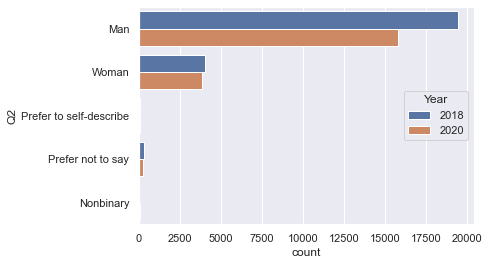

In [192]:
sns.countplot(data = df2018y2020,y = "Q2",hue="Year",hue_order=[2018, 2020])

In [228]:
#df2018y2020
df2018y2020.groupby(['Q2','Year'], as_index=True).agg({'Year': ['count']})
#x=df2018y2020.groupby(["Q2", "Year"], as_index=False)["Year"].count()
#x

Year
                              count
Q2                      Year       
Man                     2018  19430
                        2020  15789
Nonbinary               2020     52
Prefer not to say       2018    340
                        2020    263
Prefer to self-describe 2018     79
                        2020     54
Woman                   2018   4010
                        2020   3878

# Edades

In [202]:
df2018y2020.sort_values("Q1",inplace=True)
df2018y2020.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='Q1', ylabel='count'>

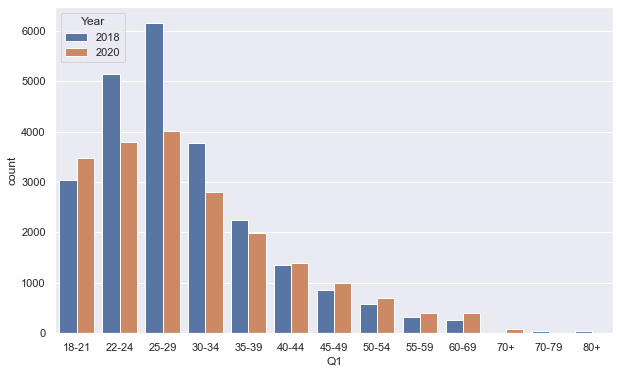

In [203]:
 sns.set(rc={'figure.figsize': (10,6)})
sns.countplot(data = df2018y2020,x = "Q1",hue="Year",hue_order=[2018, 2020])

# Online plataforms

In [204]:
dfOnline2018 = df2018[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6',
                                   'Q36_Part_7','Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12',
                                   'Q36_Part_13']]
dfOnline2018.head()

,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13
0,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN
4,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
dfOnline2020 = df2020[['Q37_Part_1','Q37_Part_2','Q37_Part_3','Q37_Part_4','Q37_Part_5','Q37_Part_6',
                                   'Q37_Part_7','Q37_Part_8','Q37_Part_9','Q37_Part_10','Q37_Part_11','Q37_OTHER']]
dfOnline2020.head()

,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER
0,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...
1,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN
2,Coursera,NaN,NaN,DataCamp,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,NaN
3,Coursera,edX,NaN,NaN,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN
4,Coursera,NaN,NaN,DataCamp,NaN,NaN,NaN,LinkedIn Learning,NaN,University Courses (resulting in a university ...,NaN,NaN


In [206]:
dfOnline2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q37_Part_1   7383 non-null   object
 1   Q37_Part_2   2499 non-null   object
 2   Q37_Part_3   4844 non-null   object
 3   Q37_Part_4   3033 non-null   object
 4   Q37_Part_5   1059 non-null   object
 5   Q37_Part_6   2057 non-null   object
 6   Q37_Part_7   4627 non-null   object
 7   Q37_Part_8   1618 non-null   object
 8   Q37_Part_9   1077 non-null   object
 9   Q37_Part_10  3569 non-null   object
 10  Q37_Part_11  1307 non-null   object
 11  Q37_OTHER    1637 non-null   object
dtypes: object(12)
memory usage: 1.8+ MB


In [207]:
dfOnline2018.drop([0],inplace=True)
dfOnline2018.reset_index(drop=True,inplace=True)
dfOnline2020.drop([0],inplace=True)
dfOnline2020.reset_index(drop=True,inplace=True)

In [208]:
dfOnline2018.head()

,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN
3,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Udacity,Coursera,edX,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
dfOnline2018=dfOnline2018.melt()
dfOnline2018.drop(columns=['variable'],inplace=True)
dfOnline2018.dropna(inplace=True)
dfOnline2018.rename(columns={'value':'Online_Source'},inplace=True)
dfOnline2018["Year"]=2018
dfOnline2018.head()

,Online_Source,Year
4,Udacity,2018
7,Udacity,2018
9,Udacity,2018
11,Udacity,2018
15,Udacity,2018


In [210]:
dfOnline2020=dfOnline2020.melt()
dfOnline2020.drop(columns=['variable'],inplace=True)
dfOnline2020.dropna(inplace=True)
dfOnline2020.rename(columns={'value':'Online_Source'},inplace=True)
dfOnline2020["Year"]=2020
dfOnline2020.head()

,Online_Source,Year
0,Coursera,2020
1,Coursera,2020
2,Coursera,2020
3,Coursera,2020
6,Coursera,2020


In [211]:
dfOnline2018y2020 = pd.concat([dfOnline2020, dfOnline2018], ignore_index=True)

<AxesSubplot:xlabel='count', ylabel='Online_Source'>

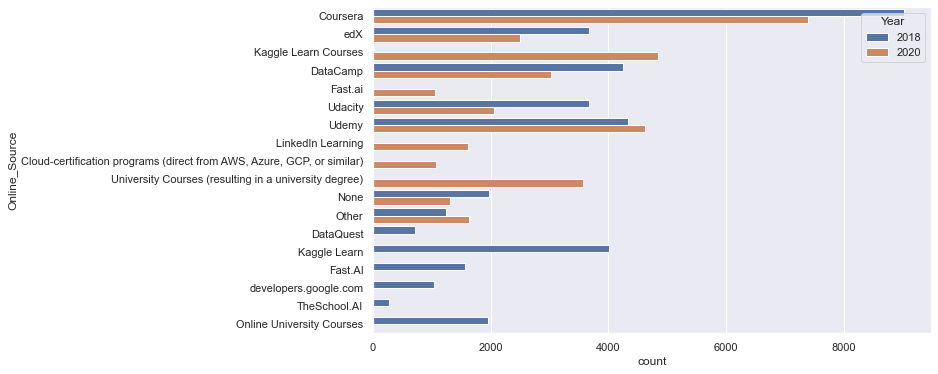

In [212]:
sns.set(rc={'figure.figsize': (10,6)})
sns.countplot(data = dfOnline2018y2020,y = "Online_Source",hue="Year",hue_order=[2018, 2020])

# First language

In [213]:
dfFirstL2018=pd.DataFrame(df2018.Q18)
dfFirstL2020=pd.DataFrame(df2020.Q8)


In [214]:
dfFirstL2018

,Q18
0,What programming language would you recommend ...
1,Python
2,Python
3,Python
4,SQL
...,...
23855,Python
23856,NaN
23857,NaN
23858,NaN


In [215]:
dfFirstL2018.drop([0],inplace=True)
dfFirstL2018.dropna(inplace=True)
dfFirstL2018.reset_index(drop=True,inplace=True)
dfFirstL2020.drop([0],inplace=True)
dfFirstL2020.dropna(inplace=True)
dfFirstL2020.reset_index(drop=True,inplace=True)


In [216]:
dfFirstL2018.rename(columns={"Q18":"First"},inplace=True)
dfFirstL2020.rename(columns={"Q8":"First"},inplace=True)
dfFirstL2018["Year"]=2018
dfFirstL2020["Year"]=2020

In [217]:
dfFirstL2018y2020 = pd.concat([dfFirstL2018, dfFirstL2020], ignore_index=True)

<AxesSubplot:xlabel='count', ylabel='First'>

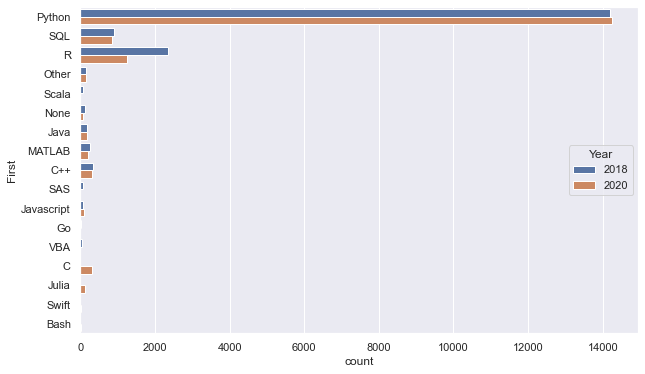

In [218]:
sns.set(rc={'figure.figsize': (10,6)})
sns.countplot(data = dfFirstL2018y2020,y = "First",hue="Year",hue_order=[2018, 2020])